Student Information Name:林孮瑋

Student ID:110062665

GitHub ID:JohnnyLin97
_______________________________________________________________________________________________________________________________

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

# Part.1 Take Home Exercises

### Exercise 2      
Experiment with other querying techniques using pandas dataframes

In [2]:
"""this cell complete the same task as lab1-master"""

# data preparation
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

import pandas as pd
import helpers.data_mining_helpers as dmh


# converting to pandas dataframe and adding columns
df = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
df['category'] = twenty_train.target
df['category_name'] = df.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [3]:
# search category of "sci.med" from index 100 to 150
filt = (df['category_name'] == 'sci.med')
df.loc[100:150][filt]

<ipython-input-3-862502edb84d>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.loc[100:150][filt]


,text,category,category_name
103,From: mrb@cbnewsj.cb.att.com (m..bruncati) Sub...,2,sci.med
109,From: nyeda@cnsvax.uwec.edu (David Nye) Subjec...,2,sci.med
111,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
115,"Subject: ""STAR GARTDS"" <sp?> Info wanted From:...",2,sci.med
117,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
118,From: rogers@calamari.hi.com (Andrew Rogers) S...,2,sci.med
121,From: cash@convex.com (Peter Cash) Subject: Re...,2,sci.med
123,From: david@stat.com (David Dodell) Subject: H...,2,sci.med
126,From: rousseaua@immunex.com Subject: Re: Barbe...,2,sci.med
132,From: kxgst1+@pitt.edu (Kenneth Gilbert) Subje...,2,sci.med


### Exercise 5
Please check the data and the process below, describe what you observe and why it happened.

In [4]:
"""this cell complete the same task as lab1-master"""

import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df



,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [5]:
"""this cell complete the same task as lab1-master"""

NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [6]:
# Check type of each inex
for i in range(0,6):
    print(type(NA_df['missing_example'][i]))

<class 'float'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'NoneType'>
<class 'str'>


Obviously, index 2、3、5 are type 'str', so they're not null.
When numpy reading a number that is not readable or null, numpy would set this field to "nan". It's easy to identify as null, but sometimes may be some error of data type.
Index 1 is empty and index4 is 'None'. It's easy to identify them as null.

### Exercise 6
Notice any changes to the dataframe? What are they? Report every change you noticed as compared to the previous state of dataframe.

In [7]:
df_sample = df.sample(n=1000)
df_sample[0:10]

,text,category,category_name
1567,From: kxgst1+@pitt.edu (Kenneth Gilbert) Subje...,2,sci.med
66,From: paj@uk.co.gec-mrc (Paul Johnson) Subject...,2,sci.med
1902,From: dmp@fig.citib.com (Donna M. Paino) Subje...,2,sci.med
1693,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
1713,From: cs89mcd@brunel.ac.uk (Michael C Davis) S...,3,soc.religion.christian
1879,From: randerso@acad1.sahs.uth.tmc.edu (Robert ...,3,soc.religion.christian
1940,From: sbuckley@sfu.ca (Stephen Buckley) Subjec...,3,soc.religion.christian
676,From: REXLEX@fnal.fnal.gov Subject: Babylon Bo...,3,soc.religion.christian
1570,From: sandvik@newton.apple.com (Kent Sandvik) ...,0,alt.atheism
479,From: RICK@ysub.ysu.edu (Rick Marsico) Subject...,2,sci.med


In [8]:
for i in range(0,4):
    counter_before = df.apply(lambda x: True if x[1] == i else False , axis=1)
    counter_after = df_sample.apply(lambda x: True if x[1] == i else False , axis=1)
    print("category=",i,"(before): ",len(counter_before[counter_before == True].index),\
          "   |   category=",i,"(after): ",len(counter_after[counter_after == True].index))

category= 0 (before):  480    |   category= 0 (after):  227
category= 1 (before):  584    |   category= 1 (after):  252
category= 2 (before):  594    |   category= 2 (after):  262
category= 3 (before):  599    |   category= 3 (after):  259


1.Sampling would randomly pick data, so the order of index would be out of order.  
2.Sampling would pick different data each time.  
3.Each category is picked into nearly the same amount each time

### Exercise 8
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise.

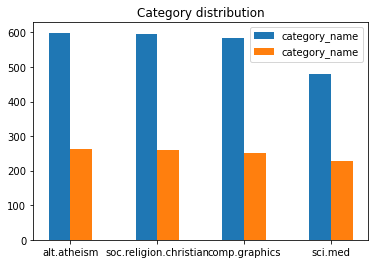

In [9]:
import matplotlib.pyplot as plt

width = 0.25
x = np.arange(4)
plt.bar(x - width/2,df.category_name.value_counts(), width, label='category_name')
plt.bar(x + width/2,df_sample.category_name.value_counts(), width, label='category_name')
plt.title('Category distribution')
plt.xticks(x, categories)
plt.legend()
plt.show()

### Exercise 10
Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary.

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.text)

# Search which index is 1, then get the corresponding term 
for i in range(1,100):
    if df_counts[4,i]==1:
        print("Word ",i," is:",count_vect.get_feature_names()[i])

Word  37  is: 01


### Exercise 11
As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it.

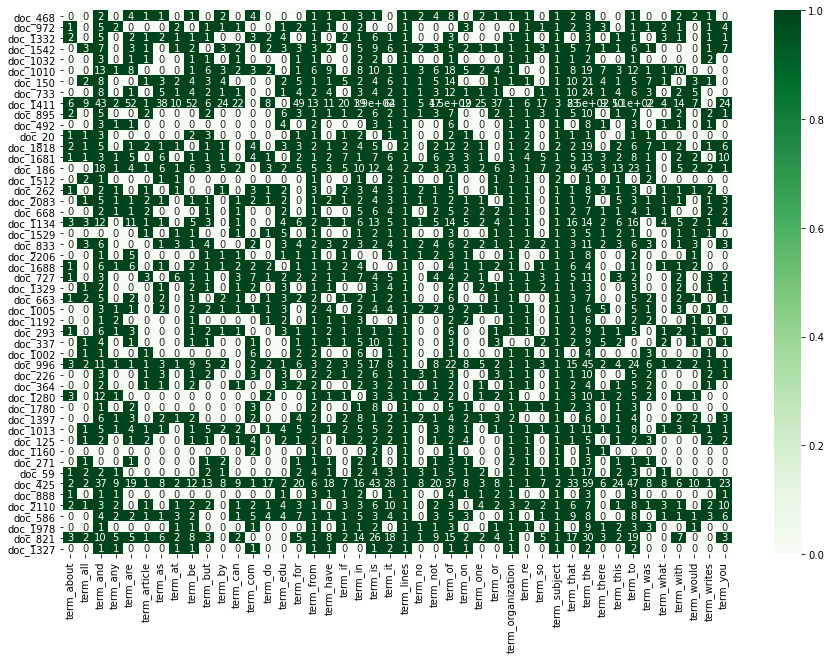

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# sample 50 articles and terms, and set min_df
df_sample = df_sample.sample(50)
count_vect50 = CountVectorizer(min_df=20)
df_counts_sample = count_vect50.fit_transform(df_sample.text)

"""same as lab1-master"""
plot_x = ["term_"+str(i) for i in count_vect50.get_feature_names()]
plot_y = ["doc_"+ str(i) for i in list(df_sample.index)[0:]]
plot_z = df_counts_sample[0:, 0:].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(15, 10))
ax = sns.heatmap(df_todraw,
                 cmap="Greens",
                 vmin=0, vmax=1, annot=True)

### Exercise 12
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

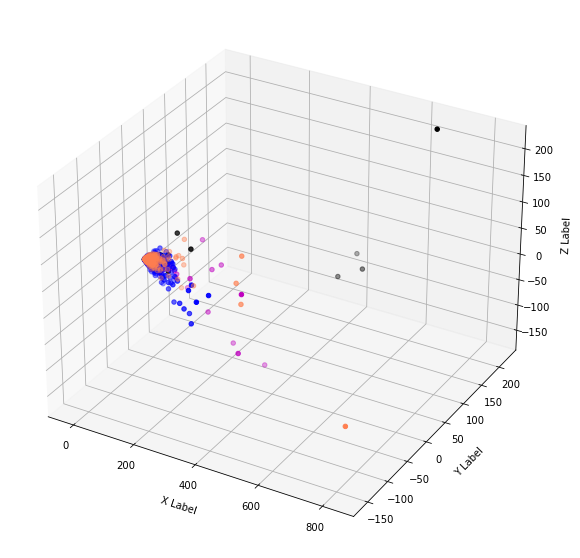

In [12]:
from sklearn.decomposition import PCA

df_reduced = PCA(n_components = 3).fit_transform(df_counts.toarray())

# plot
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(1, 1, 1, projection='3d')
col = ['coral', 'blue', 'black', 'm']

for c, category in zip(col, categories):
    xs = df_reduced[df['category_name'] == category].T[0]
    ys = df_reduced[df['category_name'] == category].T[1]
    zs = df_reduced[df['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()    

In [13]:
from sklearn.decomposition import PCA

df_reduced = PCA(n_components = 3).fit_transform(df_counts.toarray())

# plot
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(1, 1, 1, projection='3d')
col = ['coral', 'blue', 'black', 'm']

for c, category in zip(col, categories):
    xs = df_reduced[df['category_name'] == category].T[0]
    ys = df_reduced[df['category_name'] == category].T[1]
    zs = df_reduced[df['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

# different angle
ax.view_init(elev=50, azim=50)

plt.show()  

KeyboardInterrupt: 

In [ ]:
from sklearn.decomposition import PCA

df_reduced = PCA(n_components = 3).fit_transform(df_counts.toarray())

# plot
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(1, 1, 1, projection='3d')
col = ['coral', 'blue', 'black', 'm']

for c, category in zip(col, categories):
    xs = df_reduced[df['category_name'] == category].T[0]
    ys = df_reduced[df['category_name'] == category].T[1]
    zs = df_reduced[df['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

# different angle
ax.view_init(elev=10, azim=10)

plt.show()  

### Exercise 13
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [ ]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))

In [ ]:
import plotly.express as px

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.text)
term_freq = np.asarray(df_counts.sum(axis=0))[0]

fig = px.histogram(df, 
                   x=count_vect.get_feature_names(), 
                   y=term_freq, 
                   title='Terms')

### Exercise 14
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise

### Exercise 15
Additionally, you can attempt to sort the terms on the x-axis by frequency instead of in alphabetical order. 

In [ ]:
import plotly.graph_objects as go

# count frequencies of terms
term_freq = []
term_freq = np.asarray(df_counts.sum(axis=0)[:,:200])[0]

# plot
fig5 = go.Figure(go.Bar(x=term_frequencies[:200], y=count_vect.get_feature_names()[:200],  width= 1))
fig5.show()

### Exercise 16
Try to generate the binarization using the category_name column instead. Does it work?

In [ ]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
mlb.fit(df.category_name)
mlb.classes_
df['bin_category_name'] = mlb.transform(df['category_name']).tolist()
df[0:9]

#Yes,it works!

# Part.2 Same process on the new dataset

### 2. Data Prepation

In [1]:
import pandas as pd

path1 = 'sentiment labelled sentences/amazon_cells_labelled.txt'
path2 = 'sentiment labelled sentences/imdb_labelled.txt'
path3 = 'sentiment labelled sentences/yelp_labelled.txt'

# mark the where data come from
# 0=amazon / 1=imdb / 2=yelp
df1 = pd.read_csv(path1, header = None, sep='\t', names = ['Review','Score']).assign(Category=0)
df2 = pd.read_csv(path2, header = None, sep='\t', names = ['Review','Score']).assign(Category=1)
df3 = pd.read_csv(path3, header = None, sep='\t', names = ['Review','Score']).assign(Category=2)

df = pd.concat([df1, df2, df3], ignore_index=True)
df

,Review,Score,Category
0,So there is no way for me to plug it in here i...,0,0
1,"Good case, Excellent value.",1,0
2,Great for the jawbone.,1,0
3,Tied to charger for conversations lasting more...,0,0
4,The mic is great.,1,0
...,...,...,...
2743,I think food should have flavor and texture an...,0,2
2744,Appetite instantly gone.,0,2
2745,Overall I was not impressed and would not go b...,0,2
2746,"The whole experience was underwhelming, and I ...",0,2


### 3. Data Transformation

In [2]:
# We've already converted into Pandas Dataframe
# So,start from familiarizing data

df.iloc[::10][0:10]

,Review,Score,Category
0,So there is no way for me to plug it in here i...,0,0
10,And the sound quality is great.,1,0
20,I went on Motorola's website and followed all ...,0,0
30,"This is a simple little phone to use, but the ...",0,0
40,"It has a great camera thats 2MP, and the pics ...",1,0
50,Not loud enough and doesn't turn on like it sh...,0,0
60,Essentially you can forget Microsoft's tech su...,0,0
70,Mic Doesn't work.,0,0
80,I wear it everyday and it holds up very well.,1,0
90,For a product that costs as much as this one d...,0,0


In [3]:
df[-10:][["Review", "Category"]]

,Review,Category
2738,The refried beans that came with my meal were ...,2
2739,Spend your money and time some place else.,2
2740,A lady at the table next to us found a live gr...,2
2741,the presentation of the food was awful.,2
2742,I can't tell you how disappointed I was.,2
2743,I think food should have flavor and texture an...,2
2744,Appetite instantly gone.,2
2745,Overall I was not impressed and would not go b...,2
2746,"The whole experience was underwhelming, and I ...",2
2747,"Then, as if I hadn't wasted enough of my life ...",2


### 4. Data Mining using Pandas

In [4]:
import helpers.data_mining_helpers as dmh

df.isnull().apply(lambda x: dmh.check_missing_values(x))
len(df)
#No missing value

2748

In [5]:
sum(df.duplicated())

17

In [6]:
# Delete all duplicated data 
df.drop_duplicates(keep=False, inplace=True)

### 5. Data Preprocessing

5.1 Sampling

In [7]:
df_sample = df.sample(n=1000)
df_sample[:10]

,Review,Score,Category
2504,I had to wait over 30 minutes to get my drink ...,0,2
594,Better Than New.,1,0
2162,I can take a little bad service but the food s...,0,2
694,The design might be ergonomic in theory but I ...,0,0
2665,I got food poisoning here at the buffet.,0,2
2043,"You get incredibly fresh fish, prepared with c...",1,2
1483,"The film gives meaning to the phrase, ""Never i...",1,1
1295,See it.,1,1
2684,The sangria was about half of a glass wine ful...,0,2
1310,What this film lacks is a convincing script.,0,1


2    992
0    980
1    742
Name: Category, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

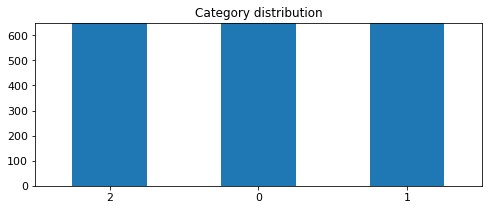

In [8]:
import matplotlib.pyplot as plt

print(df.Category.value_counts())

# plot barchart for X_sample
df.Category.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 650],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

-------------------------------------------------------------------------------
5.2 Feature Creation

In [9]:
import nltk
df['unigrams'] = df['Review'].apply(lambda x: dmh.tokenize_text(x))
df[:10]

,Review,Score,Category,unigrams
0,So there is no way for me to plug it in here i...,0,0,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,0,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,0,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,0,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,0,"[The, mic, is, great, .]"
5,I have to jiggle the plug to get it to line up...,0,0,"[I, have, to, jiggle, the, plug, to, get, it, ..."
6,If you have several dozen or several hundred c...,0,0,"[If, you, have, several, dozen, or, several, h..."
7,If you are Razr owner...you must have this!,1,0,"[If, you, are, Razr, owner, ..., you, must, ha..."
8,"Needless to say, I wasted my money.",0,0,"[Needless, to, say, ,, I, wasted, my, money, .]"
9,What a waste of money and time!.,0,0,"[What, a, waste, of, money, and, time, !, .]"


-----------------------------------------------------------------------------------------------------------------------------
5.3 Feature subset selection

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.Review)
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

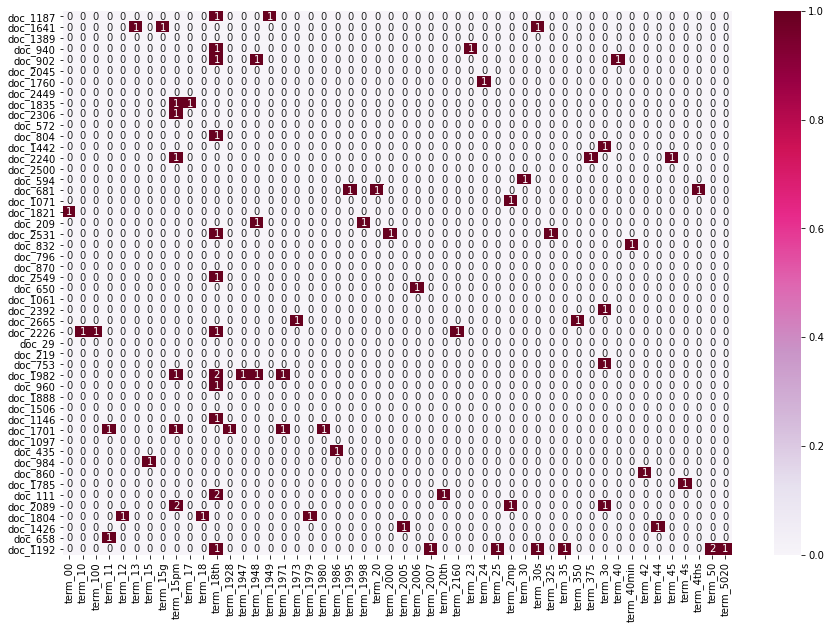

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sample_count_vect = CountVectorizer()
df_sample = df.sample(50)
df_sample_count = sample_count_vect.fit_transform(df_sample.Review)


plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:50]]
plot_y = ["doc_"+ str(i) for i in list(df_sample.index)]
plot_z = df_sample_count[:50,:50].toarray()

# Draw heatmap
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(15, 10))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

-----------------------------------------------------------------------------
5.4 Dimensionality Reduction

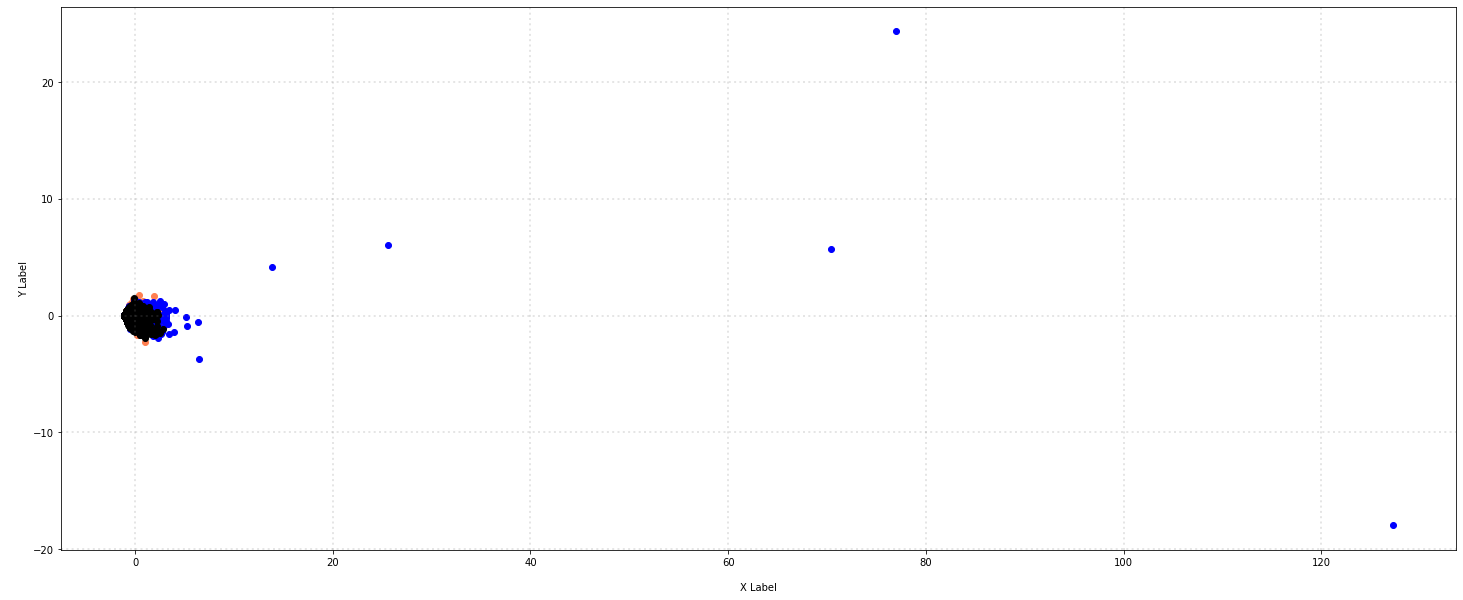

In [58]:
from sklearn.decomposition import PCA

df_reduced = PCA(n_components = 2).fit_transform(df_counts.toarray())
col = ['coral', 'blue', 'black']


# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, [0,1,2]):
    xs = df_reduced[df['Category'] == category].T[0]
    ys = df_reduced[df['Category'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

df_reduced = PCA(n_components = 3).fit_transform(df_counts.toarray())

col = ['coral', 'blue', 'black']

# plot
fig2 = plt.figure(figsize = (25,10))
ax2 = Axes3D(fig2)

for c, category in zip(col, [0,1,2]):
    xs = df_reduced[df['Category'] == category].T[0]
    ys = df_reduced[df['Category'] == category].T[1]
    zs = df_reduced[df['Category'] == category].T[2]
   
    ax2.scatter(xs, ys, zs, c = c, marker='o')

ax2.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax2.set_xlabel('\nX Label')
ax2.set_ylabel('\nY Label')
ax2.set_zlabel('\nZ Label')

plt.show()

------------------------------------------------------------------------------
5.5 Atrribute Transformation / Aggregation

In [ ]:
import numpy as np

term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))
    
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [ ]:
import plotly.graph_objects as go

# count frequencies of terms
term_freq = []
term_freq = np.asarray(df_counts.sum(axis=0)[:,:200])[0]

# plot
fig3 = go.Figure(go.Bar(x=term_frequencies[:200], y=count_vect.get_feature_names()[:200],  width= 1))
fig3.show()

In [ ]:
import math

term_frequencies_log = [math.log(i) for i in term_frequencies]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

------------------------------------------------------------------------------
5.6 Discretization and Binarization

In [ ]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
mlb.fit(df.Category)
df['bin_category'] = mlb.transform(df['Category']).tolist()
df[:10]

### 6. Data Exploration

In [ ]:
# We retrieve 3 sentences for a random record, here we just indexed at 50, 100 and 150
document_to_transform_1 = []
random_record_1 = df.iloc[50]
random_record_1 = random_record_1['Review']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[100]
random_record_2 = random_record_2['Review']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[150]
random_record_3 = random_record_3['Review']
document_to_transform_3.append(random_record_3)

print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

#  Part.3 Tasks on the new dataset

### Generate meaningful new data visualizations. 

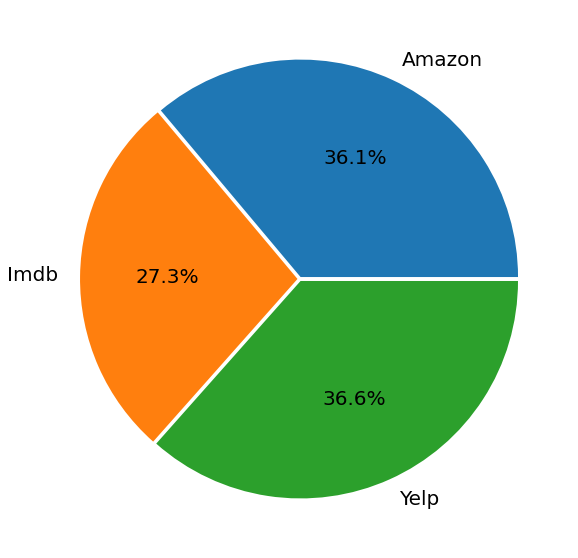

In [41]:
# Use pie chart to show the propotion of data source
freq = df.groupby(['Category']).count() 

plt.figure(figsize=(10,10))

# 0=amazon 1=imdb 2=yelp
labels = ["Amazon", "Imdb", "Yelp"]
size = freq["Review"]                         
separeted = (0.01,0.01,0.01)

plt.pie(size,                           
        autopct = "%1.1f%%",           
        labels = labels,
        pctdistance = 0.6,            
        explode = separeted,
        textprops = {"fontsize" : 20})                    

plt.show()

### Generate TF-IDF features from the tokens of each text. 

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
 
vectorizer = TfidfTransformer(smooth_idf=True)

# Learn vocabulary and idf, return document-term matrix
df_tfidf = vectorizer.fit_transform(df_counts)

result_tfidf = pd.DataFrame(Z.toarray(),columns=count_vect.get_feature_names())
result_tfidf

,00,10,100,11,12,13,15,15g,15pm,17,...,yucky,yukon,yum,yummy,yun,z500a,zero,zillion,zombie,zombiez
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Implement a simple Naive Bayes classifier that automatically classifies the records into their categories.

with TF-IDF

In [77]:
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

vectorizer = TfidfVectorizer()

# add with tf-idf
df_counts_tfidf = vectorizer.fit_transform(df.Review)
vectorizer.get_feature_names()
df['tfidf']=list(vectorizer.fit_transform(df['Review']).toarray())

l = preprocessing.LabelEncoder()
score = l.fit_transform(df['Score'])
features = list(df['tfidf'])

# create model
model = GaussianNB()
model.fit(features, score)
expected = score
predicted = model.predict(features)

print(metrics.classification_report(expected, predicted))




              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1348
           1       0.98      0.97      0.98      1366

    accuracy                           0.98      2714
   macro avg       0.98      0.98      0.98      2714
weighted avg       0.98      0.98      0.98      2714



With word frequency

In [78]:
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

# add with word frequency
df['freq'] = list(df_counts.toarray())

l = preprocessing.LabelEncoder()
score = l.fit_transform(df['Score'])
features = list(df['freq'])

# create model
model = GaussianNB()
model.fit(features, score)
expected = score
predicted = model.predict(features)

print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      1348
           1       0.86      0.99      0.92      1366

    accuracy                           0.92      2714
   macro avg       0.93      0.92      0.92      2714
weighted avg       0.93      0.92      0.92      2714



# Part.4 
What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets?

### Lemmatization
    We can try lemmatization to analysis words more precisely. Because reviews in the new dataset are from website, words might be casual.
    NLTK has package "WordNetLemmatizer" that can do lemmatization. Just need few code to achieve. It do lemmatization word by word,  so might cost time.